# 数据整理及清洗

In [57]:
import numpy as np
import pandas as pd
dt = pd.read_csv('lagou.csv',encoding='utf-8')
dt.head()

,name,area,wage,experience,frim,others
0,数据库工程师（DBA）,荔湾区,12k-18k,12k-18k\n 经验3-5年 / 本科,名创优品miniso,移动互联网 / B轮 / 2000人以上
1,数据库治理工程师,珠江新城,10k-20k,10k-20k\n 经验3-5年 / 本科,和宇健康科技股份有限公司,医疗丨健康 / 不需要融资 / 150-500人
2,数据挖掘工程师,岭南,15k-30k,15k-30k\n 经验3-5年 / 不限,快乐种子,"教育,游戏 / B轮 / 2000人以上"
3,数据运营专员,天河区,5k-10k,5k-10k\n 经验1-3年 / 本科,SuperADS,"移动互联网,广告营销 / A轮 / 50-150人"
4,大数据开发工程师,天河公园,12k-20k,12k-20k\n 经验1-3年 / 本科,广州汇智通信技术有限公司,信息安全 / 不需要融资 / 500-2000人


In [58]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
name          450 non-null object
area          450 non-null object
wage          450 non-null object
experience    450 non-null object
frim          450 non-null object
others        450 non-null object
dtypes: object(6)
memory usage: 21.2+ KB


In [59]:
dt['experiences'], dt['degree'] = dt['experience'].str.split('/', 1).str#对experience列进行拆分
dt['experiences'] = dt['experiences'].str.split(' ', 1).str[1]

dt['type'],dt['investment']= dt['others'].str.split('/', 1).str#对others列进行拆分
dt['investment'],dt['number_of_firm'] = dt['investment'].str.split('/', 1).str

dt = dt.drop(['experience','others'],axis=1)#删去experience,others列
dt.head()

,name,area,wage,frim,experiences,degree,type,investment,number_of_firm
0,数据库工程师（DBA）,荔湾区,12k-18k,名创优品miniso,经验3-5年,本科,移动互联网,B轮,2000人以上
1,数据库治理工程师,珠江新城,10k-20k,和宇健康科技股份有限公司,经验3-5年,本科,医疗丨健康,不需要融资,150-500人
2,数据挖掘工程师,岭南,15k-30k,快乐种子,经验3-5年,不限,"教育,游戏",B轮,2000人以上
3,数据运营专员,天河区,5k-10k,SuperADS,经验1-3年,本科,"移动互联网,广告营销",A轮,50-150人
4,大数据开发工程师,天河公园,12k-20k,广州汇智通信技术有限公司,经验1-3年,本科,信息安全,不需要融资,500-2000人


# 数据探索

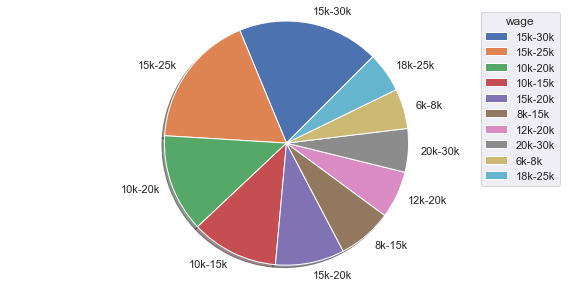

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))#设置图大小

dt_wage = dt.wage.value_counts()
dt_wage= dt_wage[dt_wage>10]
# 绘制图形
plt.pie(dt_wage.values,labels=dt_wage.index, shadow=True, startangle=45)
plt.axis('equal')
plt.legend(title='wage')

### 大多数薪资在10k~30k之间

Text(0.5, 1.0, 'area')

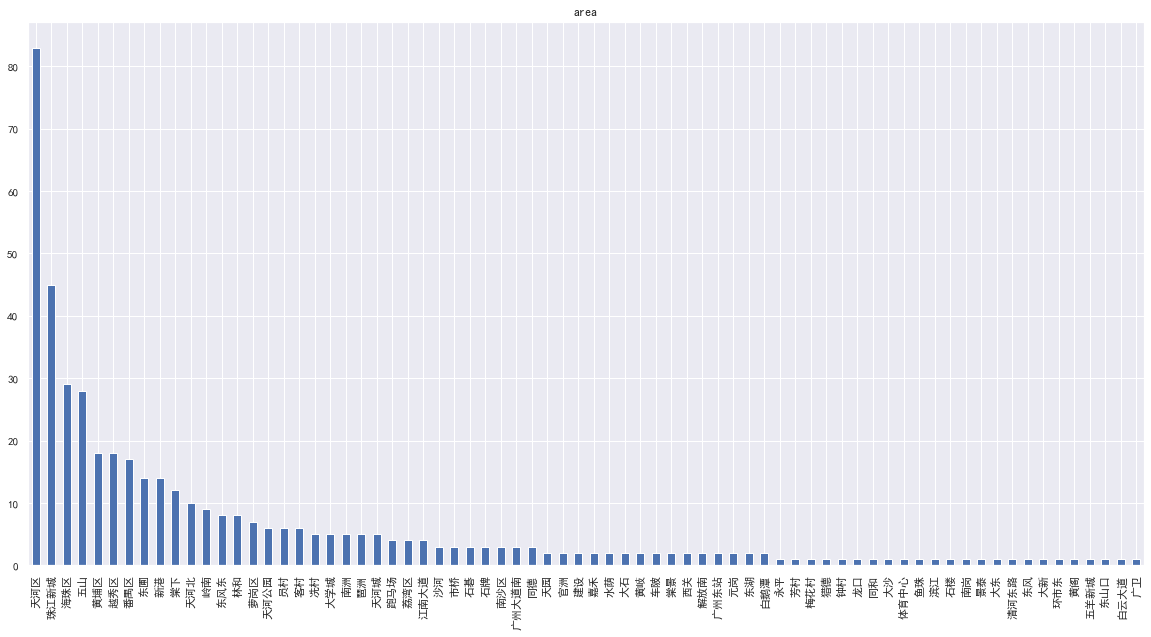

In [119]:
plt.figure(figsize=(20, 10))#设置图大小
dt.area.value_counts().plot(kind='bar')
plt.title('area') # 标题

### 公司集中在天河区一带

Text(0.5, 1.0, 'experiences')

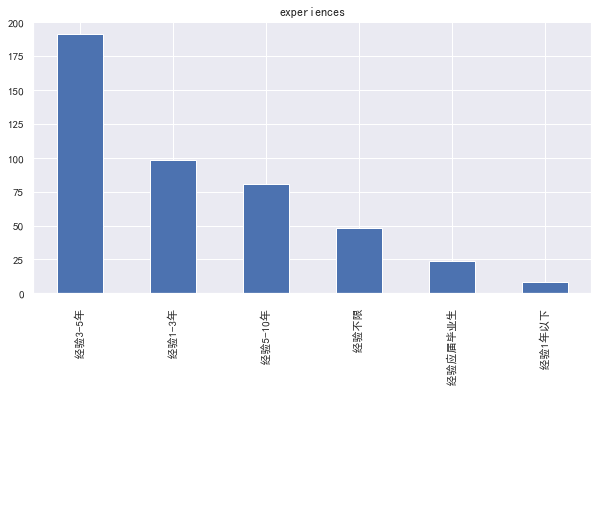

In [124]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10, 5))#设置图大小
dt.experiences.value_counts().plot(kind='bar')
plt.title('experiences') # 标题

### 大多数经验要求3-5年

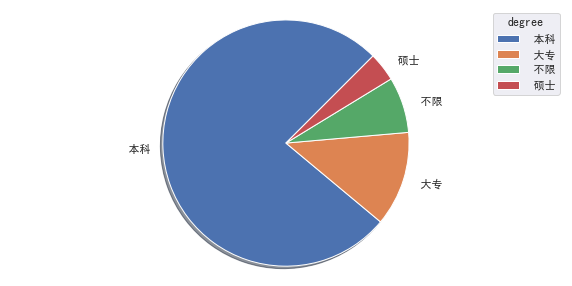

In [127]:
plt.figure(figsize=(10, 5))#设置图大小
dt_degree = dt.degree.value_counts(normalize=True)
# 绘制图形
plt.pie(dt_degree.values,labels=dt_degree.index, shadow=True, startangle=45)
plt.axis('equal')
plt.legend(title='degree')

### 76%的工作需要本科学历

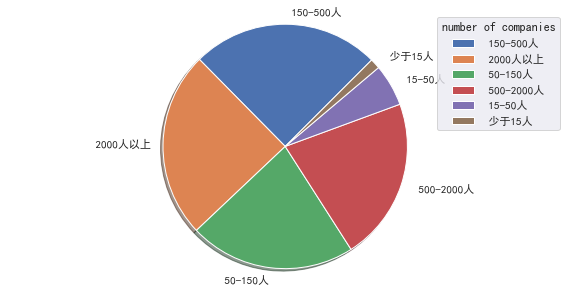

In [130]:
plt.figure(figsize=(10, 5))#设置图大小
dt_nof = dt.number_of_firm.value_counts(normalize=True)
# 绘制图形
plt.pie(dt_nof.values,labels=dt_nof.index, shadow=True, startangle=45)
plt.axis('equal')
plt.legend(title='number of companies')